<p style='color:black; font-size:32px; text-align:center'> <strong>SVM </strong> <br>
Et si la Poste se mettait à l'IA ?

</p>

# Sommaire <a class="anchor" id="Sommaire"></a>

* [Introduction](#intro)
* [Prérequis](#Imports)
* [I. Import des données](#donnees)
* [II. Phase exploratoire des données](#exp)
* [III. Division en sous-ensembles ](#div)
* [IV. SVM](#model)
* [V. Optimisation et performance](#opti)
* [Conclusion générale](#Conclusion)

# Introduction  <a class="anchor" id="intro"></a>
> <p> La poste fait appel à vous pour déveloper un programme d'intelligence artificielle qui lui permettrait de reconnaitre automatiquement les codes postaux écrits sur les enveloppes. Ceci lui permettrait d'accélerer sa chaîne de distribution du courrier en fonction des départements. </p>

# Prérequis <a class="anchor" id="Imports"></a>

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

# pour étendre l'affichage de la sortie pour les colonnes 
pd.set_option('display.max_columns', None)

# PARTIE 1 : Import des données <a class="anchor" id="donnees"></a>

In [3]:
# Importer le Dataset en csv

df = pd.read_csv(r"train.csv")

> ### Premier aperçu de mon dataset

In [16]:
# Afficher les cinq premières lignes
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [17]:
# Afficher les cinq dernières lignes
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [18]:
# On vérifie la volumétrie de notre dataframe 
df.shape

(42000, 785)

In [21]:
# On vérifie le nom des différentes colonnes
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Notre dataframe est assez grande : elle contient 42000 lignes pour 785 colonnes. Cet ensemble représente des pixels d'images de chiffres. La première colonne, appelée label, correspond au chiffre représenté par les 784 colonnes de pixels.</p>

 # PARTIE 2:  Phase exploratoire des données <a class="anchor" id="exp"></a>

In [22]:
# Aperçu des informations, présence ou non d'éléments nulls, type de variables, mémoire...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


> ### Valeurs manquantes

In [25]:
# Afficher les valeurs nulles
df.isna().sum().sum() # ou df.isna().any()

0

 > ### Statistiques descriptives

In [19]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Toutes nos données sont de type integer 64. Nous n'avons pas de NaNs à traiter. La fonction describe() nous permet surtout de comprendre la colonne label. Les images affichent des chiffres de 0 à 9, avec une médiane à 4 ce qui est logique.</p>

 > ### Fréquence absolue et fréquence relative

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **frequence absolue :**
 <p style="color:#4caba9;"> Nombre d'éléments appartenant à une classe. Connaître la répartition brute.</p>
    
    

In [78]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **fréquence relative:**
 <p style="color:#4caba9;"> On la calcule en divisant la fréquence absolue par la taille de l'échantillon. Concrètement, une fréquence relative donne une indication sur la fréquence d'apparition d'un évènement dans une série d'évènements </p>

In [79]:
# On ajoute "normalize" pour l'avoir en %

df['label'].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">La répartition des valeurs de la target (colonne label) est assez homogène. Ces valeurs représentent de 11% à 9% de l'ensemble. Nous ne sommes pas obligés d'utiliser un stratify, mais son usage pourrait sans doute affiner la performance du modèle en sortie.</p>

 > ### On transforme nos données integer (64) en integer (8)

In [80]:
# On vérifie les dtypes avant
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [4]:
# On applique la transformation dans une boucle for
for col in list(df.columns):
    df[col] = pd.to_numeric(df[col], downcast='integer')
# pd.to_numeric va retourner la dataframe transformée et downcast va réduire le dtype integer au plus bas possible

In [5]:
# On vérifie les dtypes après la transformation
df.dtypes

label       int8
pixel0      int8
pixel1      int8
pixel2      int8
pixel3      int8
            ... 
pixel779    int8
pixel780    int8
pixel781    int8
pixel782    int8
pixel783    int8
Length: 785, dtype: object

# PARTIE 3: Division en sous-ensembles <a class="anchor" id="div"></a>

In [20]:
# Avant de diviser, je stocke le dataframe dans 2 tableaux numpy  x et y pour séparer les variables dep et ind

X = df.iloc[:,1:].values
y = df.iloc[:,0].values  
print('taille des features = ', X.shape)
print('taille de la target = ', y.shape)

taille des features =  (42000, 784)
taille de la target =  (42000,)


> ### Normalisation des données avec la division par 255.0

In [8]:
# 255 : les images contiennent des pixels de 0 à 255, la valeur maximale est de 255 et la minimale est de 0.
# La division par 255.0 est une normalisation qu'on applique généralement aux images des datasets
# Une image contient 784 pixels, un pixel peut avoir une valeur de 0 à 255 ... La boucle est bouclée !
X = X/255.0
# C'est une normalisation qui fonctionne un peu comme MinMaxScaler()

In [9]:
# Division en sous-ensembles Train et Test
# train_size = on lui indique 20% du dataframe, pour que notre matériel puisse entraîner les modèles !
# test_size = on lui indique 5% du dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.2, test_size = 0.05 , random_state = 0)

> ### Afficher la répartition des différentes classes dans y_train avec countplot

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


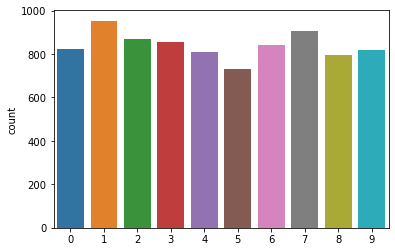

In [10]:
# Affiche le nombre d'entités pour chaque chiffres (labels)
sns.countplot(y_train)
# La question se pose d'utiliser finalement un stratify.

> ### Vérifier les `distributions relatives en apprentissage et en test des données`

In [11]:
# On affiche la volumétrie de chaque partie du split
print(" La taille de X_train est de : {}".format(X_train.shape))
print(" La taille de y_train est de : {}".format(y_train.shape))
print(" La taille de X_test est de : {}".format(X_test.shape))
print(" La taille de y_test est de : {}".format(y_test.shape))

 La taille de X_train est de : (8400, 784)
 La taille de y_train est de : (8400,)
 La taille de X_test est de : (2100, 784)
 La taille de y_test est de : (2100,)


# PARTIE 4: SVM <a class="anchor" id="model"></a>

## Construction de trois modèles différents : RBF, linear et poly.

> ### Construction du modèle RBF (par défaut)

In [12]:
# On ne précise pas le paramètre du kernel, car par défaut il est sur RBF
svc_rbf = SVC(random_state=0, verbose=True) # On génère le modèle
svc_rbf.fit(X_train, y_train) # On entraîne le modèle
y_pred_rbf = svc_rbf.predict(X_test) # On génère la prédiction

[LibSVM]

> ### Construction du modèle Linear

In [13]:
# On précise le paramètre du kernel sur 'linear'
svc_lin = SVC(kernel='linear', random_state=0, verbose=True) # On génère le modèle
svc_lin.fit(X_train, y_train) # On entraîne le modèle
y_pred_lin = svc_lin.predict(X_test) # On génère la prédiction

[LibSVM]

> ### Construction du modèle polynomial

In [14]:
# On précise le paramètre du Kernel sur 'poly'
svc_poly = SVC(kernel='poly', random_state=0) # On génère le modèle
svc_poly.fit(X_train, y_train) # On entraîne le modèle
y_pred_pol = svc_poly.predict(X_test) # On génère la prédiction

 # PARTIE 5: Evaluation et optimisation <a class="anchor" id="opti"></a>

> ### La qualité du modèle avec accuracy_score

In [15]:
# On affiche les accuracy score
svc_rbf_score = accuracy_score(y_test, y_pred_rbf) # On va vérifier l'accuracy_score du modèle RBF
svc_lin_score = accuracy_score(y_test, y_pred_lin) # On va vérifier l'accuracy_score du modèle Linear
svc_pol_score = accuracy_score(y_test, y_pred_pol) # On va vérifier l'accuracy_score du modèle Poly
print(" Accuracy score du modèle RBF : ",svc_rbf_score)
print(" Accuracy score du modèle linear : ",svc_lin_score)
print(" Accuracy score du modèle polynomial : ",svc_pol_score)

 Accuracy score du modèle RBF :  0.9561904761904761
 Accuracy score du modèle linear :  0.9119047619047619
 Accuracy score du modèle polynomial :  0.9495238095238095


In [94]:
# classification report du modèle RBF
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       193
           1       0.98      0.97      0.98       237
           2       0.97      0.96      0.97       208
           3       0.96      0.95      0.95       215
           4       0.93      0.96      0.95       223
           5       0.96      0.95      0.96       197
           6       0.94      0.99      0.96       204
           7       0.95      0.96      0.96       224
           8       0.95      0.93      0.94       201
           9       0.95      0.89      0.92       198

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [95]:
# classification report du modèle Linear
print(classification_report(y_test, y_pred_lin))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       193
           1       0.97      0.97      0.97       237
           2       0.91      0.91      0.91       208
           3       0.87      0.88      0.88       215
           4       0.92      0.93      0.92       223
           5       0.87      0.84      0.86       197
           6       0.94      0.97      0.95       204
           7       0.91      0.94      0.93       224
           8       0.89      0.84      0.86       201
           9       0.89      0.85      0.87       198

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



In [100]:
# classification report du modèle polynomial
print(classification_report(y_test, y_pred_pol))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       193
           1       0.94      0.97      0.96       237
           2       0.98      0.96      0.97       208
           3       0.96      0.94      0.95       215
           4       0.93      0.96      0.94       223
           5       0.95      0.94      0.95       197
           6       0.95      0.98      0.97       204
           7       0.94      0.97      0.96       224
           8       0.92      0.92      0.92       201
           9       0.95      0.89      0.92       198

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Les scores des trois modèles, avec les paramètres par défaut, sont bons. Celui avec le RBF est le meilleur 0.95 (95%), puis celui avec le polynomial avec 0.949 (95%). Les scores obtenus dans la classification_report confirment cette première observation.</p>

> ### On cherche les meilleurs paramètres avec GridSearch Model

In [36]:
# On réduit notre jeu de données X_train et y_train
# C'est nécessaire pour pouvoir charger rapidement les meilleurs paramètres sur datalore
X_train_red = X_train[:1000]
y_train_red = y_train[:1000]

In [29]:
# On affecte des paramètres à C, Kernel et Gamma
parameters = [{'C': [0.25,0.5,1], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001]}]
# On génère un GridSearchCV avec notre modèle rbf en estimator, les paramètres demandés et l'accuracy en scoring         
grid_search = GridSearchCV(estimator = svc_rbf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [30]:
# On charge et entraîne grid_search (environ 10 minutes)
grid_search.fit(X_train_red, y_train_red)

[LibSVM]

GridSearchCV(cv=10, estimator=SVC(random_state=0, verbose=True), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [31]:
# On affiche les meilleurs scores, les meilleurs paramètres
best_accuracy = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print('Best Test Score: ', test_score)

Best Accuracy: 90.90 %
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Test Score:  0.9142857142857143


> ### On affine la recherche de la meilleure valeur pour le paramètre C

On sait que le paramètre C a une valeur qui nous intéresse autour de 1 et de 10. On effectue quelques tests pour affiner notre recherche.

In [39]:
# On entraîne un modèle spécifique avec C = 1 et les autres bons paramètres
svc_rbf_1 = SVC(C = 1, gamma = 0.01, kernel='rbf', random_state=0)
svc_rbf_1.fit(X_train, y_train) # On entraîne le modèle
y_pred_rbf_1 = svc_rbf_1.predict(X_test) # On génère la prédiction
svc_rbf_score_1 = accuracy_score(y_test, y_pred_rbf_1) # On génère l'accuracy score

In [41]:
# On entraîne un modèle spécifique avec C = 10 et les autres bons paramètres
svc_rbf_10 = SVC(C= 10, gamma= 0.01, kernel='rbf', random_state=0)
svc_rbf_10.fit(X_train, y_train) # On entraîne le modèle
y_pred_rbf_10 = svc_rbf_10.predict(X_test) # On génère la prédiction
svc_rbf_score_10 = accuracy_score(y_test, y_pred_rbf_10) # On génère l'accuracy score

In [52]:
# On entraîne un modèle spécifique avec C = 20 et les autres bons paramètres
svc_rbf_20 = SVC(C= 20, gamma= 0.01, kernel='rbf', random_state=0)
svc_rbf_20.fit(X_train, y_train) # On entraîne le modèle
y_pred_rbf_20 = svc_rbf_20.predict(X_test) # On génère la prédiction
svc_rbf_score_20 = accuracy_score(y_test, y_pred_rbf_20) # On génère l'accuracy score

In [89]:
# On affiche l'accuracy score
print("L'accuracy score avec C = 1 est de : ",svc_rbf_score_1)
print("L'accuracy score avec C = 10 est de : ",svc_rbf_score_10)
print("L'accuracy score avec C = 20 est de : ",svc_rbf_score_20)

L'accuracy score avec C = 1 est de :  0.9528571428571428
L'accuracy score avec C = 10 est de :  0.959047619047619
L'accuracy score avec C = 20 est de :  0.9580952380952381


> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Les meilleurs paramètres retenus sont : C = 10, kernel = 'rbf' et gamma = 0.01. Ils nous permettent de construire le modèle svc_rbf_score_10. Pour l'obtenir, nous avons du entraîner le grid_search.fit() et générer plusieurs modèles avec différentes valeurs à C pour compléter notre expérimentation.</p>

> ### Matrice de confusion et performance du modèle

In [54]:
# On utilise la matrice de confusion pour vérifier la validité et la performance du modèle
cm = np.array(confusion_matrix(y_test, y_pred_rbf_10)) # On lui indique les labels 1, 0
confusion = pd.DataFrame(cm)
confusion

,0,1,2,3,4,5,6,7,8,9
0,189,0,0,1,1,0,2,0,0,0
1,0,232,1,1,1,0,0,0,1,1
2,2,1,200,0,1,0,1,2,1,0
3,0,0,1,207,0,1,2,1,3,0
4,1,0,1,0,214,0,1,0,1,5
5,0,0,0,4,0,186,6,0,1,0
6,0,0,1,0,1,0,201,0,1,0
7,0,0,0,1,3,0,0,218,0,2
8,0,2,0,3,1,5,1,1,188,0
9,3,1,1,2,5,0,0,5,2,179


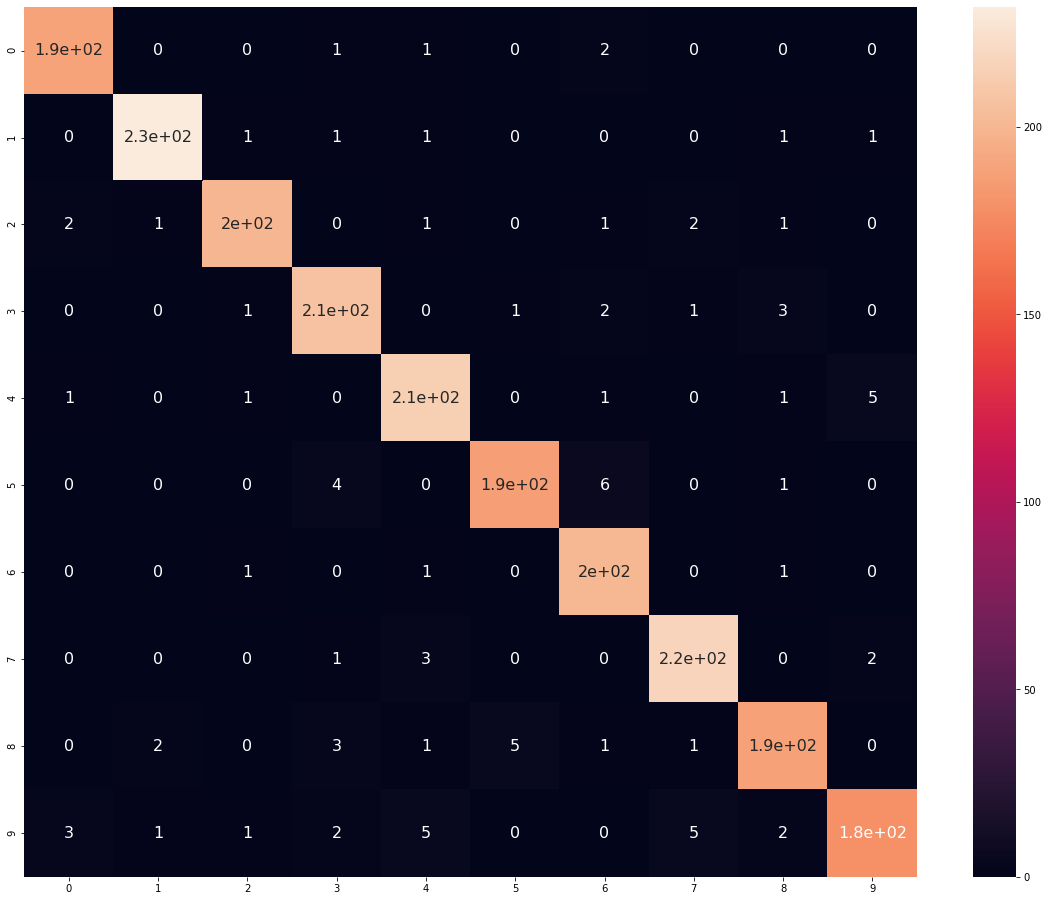

In [63]:
# On utilise une heatmap pour afficher la matrice de confusion
plt.subplots(figsize=(20,16)) # On aggrandit l'affichage de la matrice de confusion avec des couleurs
sns.heatmap(confusion, annot=True, annot_kws={'size':16}) # le annot=True permet d'afficher les chiffres de la matrice

In [56]:
# classification report 
print(classification_report(y_test, y_pred_rbf_10))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       193
           1       0.98      0.98      0.98       237
           2       0.98      0.96      0.97       208
           3       0.95      0.96      0.95       215
           4       0.94      0.96      0.95       223
           5       0.97      0.94      0.96       197
           6       0.94      0.99      0.96       204
           7       0.96      0.97      0.97       224
           8       0.95      0.94      0.94       201
           9       0.96      0.90      0.93       198

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



> ### La prédiction du modèle retenu et optimisé

In [131]:
df_test_2 = pd.read_csv('test.csv') # On importe le jeu de données de test
df_test_2 = df_test_2/255.0 # On normalise nos données de test
a = svc_rbf_10.predict(df_test_2[:10])
print("On utilise les données normalisées du test pour avoir une prédiction")
print("Sur les vingt premières lignes, le modèle prédit : ",a)

On utilise les données normalisées du test pour avoir une prédiction
Sur les vingt premières lignes, le modèle prédit :  [2 0 9 7 3 7 0 3 0 3]


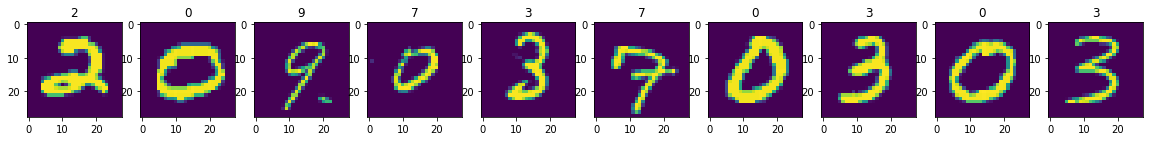

In [133]:
# On va plus pour l'affichage de la prédiction
df_test_2_img = df_test_2.values # On récupère les valeurs du df normalisé
df_test_2_img = df_test_2_img.reshape(df_test_2_img.shape[0], 28, 28) # On reshape les données

# On génère une boucle l'affichage des valeurs prédites pour les chiffres
fig, axis = plt.subplots(1, 10, figsize=(20,10))
for i, ax in enumerate(axis.flat):
    ax.imshow(df_test_2_img[i])
    num = a[i]
    ax.set(title= num)

# Conclusion générale  <a class="anchor" id="Conclusion"></a>

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion**
  <p style="color:#4caba9;">Après avoir mesuré la performance et la pertinence des différents modèles, nous avons choisi de travailler avec le kernel RBF (par défaut) du Support Vector Machine (SVM). Une fois les paramètres optimisés pour C et Gamma, nous avons vérifié une nouvelle fois les résultats de la classification_report. La version finale de notre modèle a une accuracy de 96%. Les scores de précisions sont entre 0.94 et 0.98. Les scores de rappel sont, quant à eux, entre 0.90 et 0.99. La matrice de confusion est également très encourageante, il y a assez peu de faux positifs et de vrais négatifs. Nous pouvons donc proposer ce modèle à La Poste pour qu'elle puisse accélérer sa chaîne de distribution en fonction des codes postaux. </p>

In [0]:
scaler_std = StandardScaler()

scaler_std.fit(X_train)

X_train_scaled = scaler_std.transform(X_train)
X_test_scaled = scaler_std.transform(X_test)

In [0]:
svc_rbf = SVC(random_state=0, verbose=True)
svc_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_scaled)

In [0]:
svc_lin = SVC(kernel='linear', random_state=0, verbose=True)
svc_lin.fit(X_train_scaled, y_train)
y_pred_lin = svc_lin.predict(X_test_scaled)

In [0]:
svc_poly = SVC(kernel='poly', random_state=0)
svc_poly.fit(X_train_scaled, y_train)
y_pred_pol = svc_poly.predict(X_test_scaled)

In [0]:
svc_rbf_score = accuracy_score(y_test, y_pred_rbf)
svc_lin_score = accuracy_score(y_test, y_pred_lin)
svc_pol_score = accuracy_score(y_test, y_pred_pol)
print(svc_rbf_score)
print(svc_lin_score)
print(svc_pol_score)